<a href="https://colab.research.google.com/github/veribilimi77/ChatGPT_End_to_End_Data-Science-Project_Loan_dataset/blob/main/ChatGPT_End_to_End_Data_Science_Project_Loan_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chat GPT for an End to End Data Science Project- Loan Dataset

Bu projemizde, Kaggle'dan aldığımız Loan_data dataset ile uçtan uca bir veri bilimi projesini ChatGPT'ye prompt(yönlendiriciler) aracılığı ile yaptırıp ve projemizi bu sekilde oluşturmaya calışacağız.

# 1 - Adım - Projeyi planlama



```
# This is formatted as code
```

Ilk olarak projemizi nasıl yapacagimizi planlamamiz gerek, bunun icin ChatGPT' ye asagidaki prompt'u yaziyoruz.

***Prompt: ***“I have a loan dataset consisting of 9500 rows and 14 columns: ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc','dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']. Can you list the steps I have to follow to develop an end-to-end project for my portfolio.”

Yukaridaki promptu yazdik ve ChatGPT proje adimlari listesini çıkardı.

1.  Problem Definition
2.  Data Cleaning and preprocessing
3.  Exploratory Data Analysis (EDA)
4.  Feature Engineering
5.  Model Selection
6.  Model training and evaluation
7.  Hyperparameter tuning
8.  Creating the web app using Gradio
9.  Deploying the web app on Spaces.
10. Documentation and Presentation
11. Monitoring and Maintenance


Proje listesini aldık ama sınıf dengesizliği sorununu ve projenin amacı olan "geri ödenmeyen kredi"yi doğru bir şekilde söylemeyi unuttuk. Bunun icin bir ara prompt(yönlendirici) yazıyoruz.

**Updated Prompt:** “Please include class imbalance issues and accurately predict whether a loan will not be paid back rather than if a loan is paid back.”

Bize asagidaki adimlari oneriyor bunu ilerleyen surecte yapacagiz ;

Key Adjustments to the Pipeline:
1. Handle Class Imbalance
Check the class distribution of not.fully.paid. If it is imbalanced (e.g., more loans are paid than not), apply:
Oversampling: Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class.
Undersampling: Reduce the majority class to balance both classes.
Class Weights: Assign higher weight to the minority class in models like Logistic Regression or Random Forest.
2. Adjust Model Metrics
Instead of focusing on accuracy, prioritize:
Recall (True Positive Rate): Higher recall ensures we correctly identify more cases where the loan will not be paid.
Precision-Recall AUC: Since class imbalance skews ROC-AUC, use PR-AUC to evaluate model performance.
3. Adjust Model Threshold for Decision-Making
Instead of using a default 0.5 probability threshold, adjust the decision boundary using Precision-Recall trade-offs.
Set a threshold where recall is maximized without dropping precision too much.
4. Use Cost-Sensitive Algorithms
Consider models that handle class imbalance well:
Random Forest / XGBoost with scale_pos_weight parameter.
Logistic Regression with class_weight='balanced'

Sonra aklima bu mdeli nasil deploy edebilirim fikri geliyor onuda hemen soruyorum ;

**Updated Prompt:** “We will be creating a web app using Gradio and deploying it on Spaces and we won't be monitoring the model in the production.”

Bu soruyo istegi girince bana asagidaki islemleri adim adim yapmami soyluyor.

1. Save the Trained Model

Use pickle or joblib to save the trained model.
Ensure the preprocessing pipeline (e.g., encoding, scaling) is included to avoid mismatches.
2. Build the Gradio Interface

Create a function that takes user input and returns the model's prediction.
Design an interactive UI with input fields for numerical and categorical features.
Display the prediction with probability scores.
3. Deploy on Hugging Face Spaces

Create a requirements.txt file with dependencies (e.g., gradio, scikit-learn).
Push the project to a GitHub repo and link it to Spaces for easy deployment.
Since you won’t be monitoring the model in production, ensure:

The model is robust against biased data.
Edge cases (e.g., extreme values) are handled properly.

 En guzel soru da bu :-)

 Would you like help writing the Gradio app code?

## Adim 2- Exploratory Data Analysis(EDA)

Bu adimda, data manipulasyonu, istatistiksel analizler ve veri görselleştirmeleri işlemlerini gercekleştireceğiz.

Bunun icin ChatGPT'ye asagidaki promt'u yaziyoruz.

**Follow-Up Prompt:** “Please write a Python code to load and perform Exploratory data analysis (EDA) on loan dataset”

1. Adim :  Ilgili python kutuphanelerini ve datayi (loand_data) ortama yukluyoruz.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/sample_data/loan_data.csv"  # Bu kisma dikkat edelim ve kendi datasetinizin yolunu yazalim
df = pd.read_csv(file_path)

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


2. Adim olarak: Verilerimizin istatistiksel olarak bir özetini görüntülüyoruz.

In [2]:
# Display the number of rows and columns in the dataset
print("Dataset iserisindeki  satir ve sutun sayilari: ", df.shape)

# Display summary statistics for numerical variables
print(df.describe())

Dataset iserisindeki  satir ve sutun sayilari:  (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537       

3. Adim olarak: Datasetimiz icerisindeki her bir sutunda eksik veriler var mi onlari kontrol ediyoruz. Göreceğimiz uzere datasetimizde herhangi bir eksik veri bulunmuyor. Tum veriler tam.

In [3]:
# Missing( bos olan kayitlar- Null olan kayitlar) varmi ona bakalim
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


4.Adim olarak hedef(target variable:"not.fully.paid") değişkenimizin dağılım grafiğine bakalım.

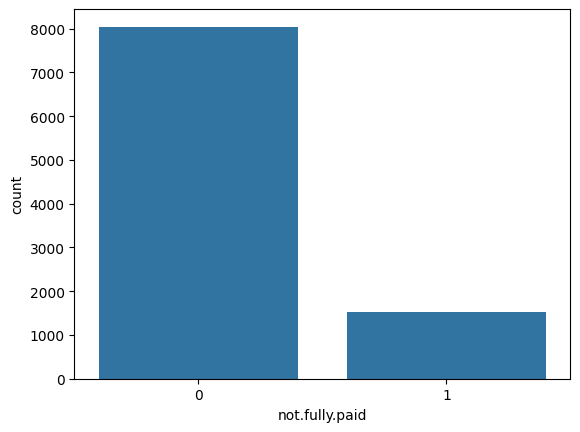

In [5]:
# Hedef degiskenin dagilim grafigine bakalim
sns.countplot(x = "not.fully.paid", data = df)
plt.show()

5. Adim olarak:

Datasetimizde bulunan degiskenlerimizin(sutunlar) arasindaki iliskiye(korelasyon)'a bakalim.

In [7]:
# Korelasyon Matrix
print("\nKorelasyon matriksi: ")
numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti',
                      'fico', 'revol.bal', 'revol.util', 'inq.last.6mths',
                      'delinq.2yrs', 'pub.rec']
corr_matrix = df[numerical_features].corr()
print(corr_matrix)


Korelasyon matriksi: 
                int.rate  installment  log.annual.inc       dti      fico  \
int.rate        1.000000     0.276140        0.056383  0.220006 -0.714821   
installment     0.276140     1.000000        0.448102  0.050202  0.086039   
log.annual.inc  0.056383     0.448102        1.000000 -0.054065  0.114576   
dti             0.220006     0.050202       -0.054065  1.000000 -0.241191   
fico           -0.714821     0.086039        0.114576 -0.241191  1.000000   
revol.bal       0.092527     0.233625        0.372140  0.188748 -0.015553   
revol.util      0.464837     0.081356        0.054881  0.337109 -0.541289   
inq.last.6mths  0.202780    -0.010419        0.029171  0.029189 -0.185293   
delinq.2yrs     0.156079    -0.004368        0.029203 -0.021792 -0.216340   
pub.rec         0.098162    -0.032760        0.016506  0.006209 -0.147592   

                revol.bal  revol.util  inq.last.6mths  delinq.2yrs   pub.rec  
int.rate         0.092527    0.464837        0.202

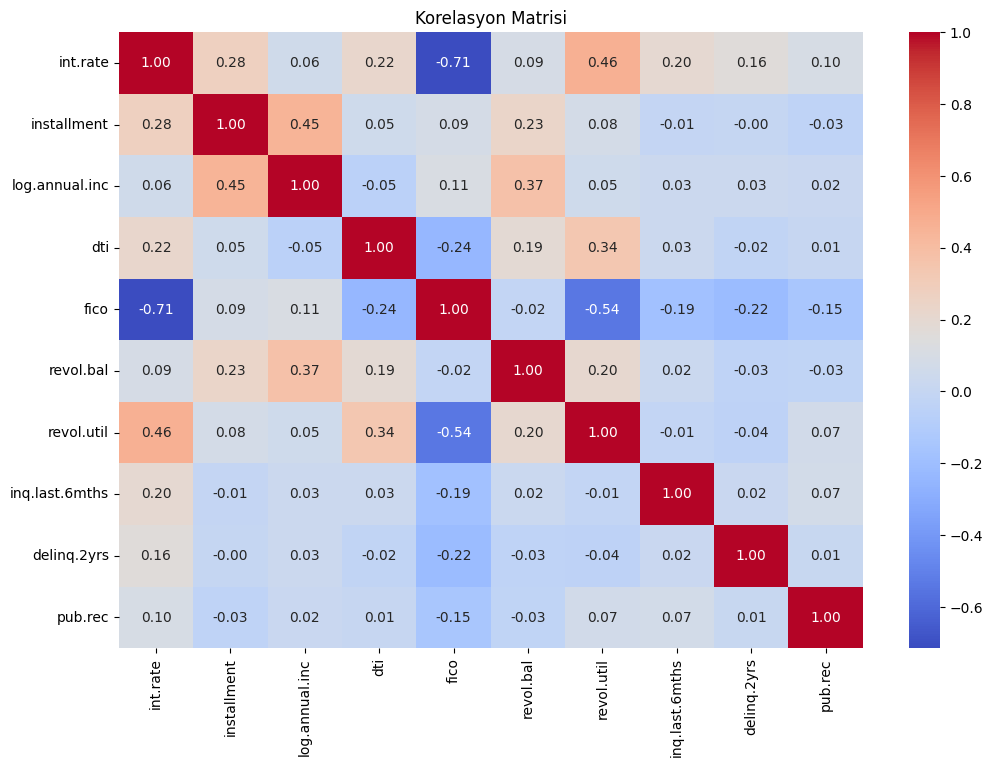

In [8]:
# Yukaridaki veri ciktisi cok anlamli olmayabilir bu nedenle isi haritasi(heatmap) uzerinde korelasyon daha net anlasilacaktir
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

6. Adim olarak bakalim bu borclar hangi amaclar icin alinmis :-)

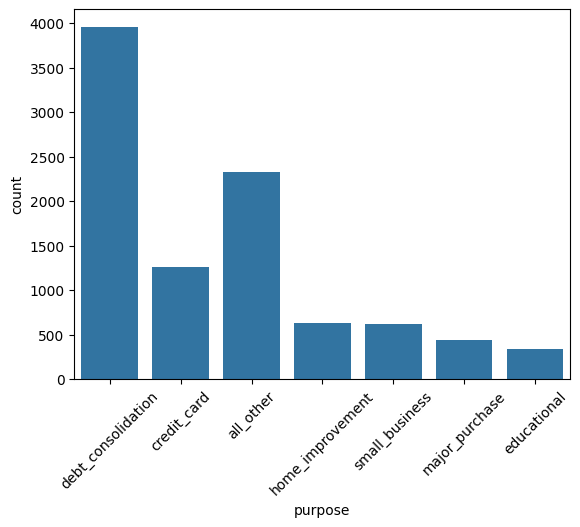

In [ ]:
sns.countplot(x = "purpose", data=df)
plt.xticks(rotation=45)
plt.show()

7.Adim : Bakalim bu alinan borclardaki faiz oranlari dagilimi nasılmış?

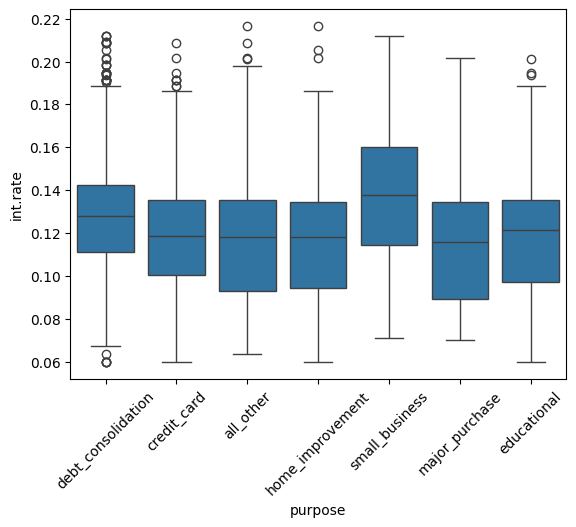

In [9]:
sns.boxplot(x="purpose", y="int.rate", data=df)
plt.xticks(rotation=45)
plt.show()

Evet, genel adimlardan 1. Adımı yani veriyi keşfetme islemini tamamladik.

Simdi 2. Adıma gecelim.
# 2 - Feature Engineering (Özellik muhendisliği- Özellik cıkarımı)
Bu adimla veri temizligi falan yapmayacagiz bunun yerine feature engineering islemini yaparak data on isleme adimini gerceklestirecegiz.

ChatGPT ye gidip  kaldigimiz yerden  prompt(yönlendirici) vermeye devam edelim.

**Prompt :** Write a Python code to perform feature engineering

Yukaridaki promptu yazinca bize bir python kodu veriyor ancak şöyle bir ilave yapacağım ;

Updated Prompt:"only add feature engineering part."

In [10]:
# Perform Feature engineering
df["installment_to_income_ratio"] = (
    df["installment"] / df["log.annual.inc"]
)
df["credit_history"] = (df["delinq.2yrs"] + df["pub.rec"]) / df["fic

ChatGPT bize iki yeni alan eklememizi önerdi bunlar;
"installment_to_income" ve "credit_history"

# 3 - Ön işlem (preprocessing) ve duzenleme(Data Balancing)

Yukaridaki adimlari ChatGPT biliyor dolayisi ile yeni prompt yazarken genel aciklama yapmamiza gerek yok, sadece yaptiracagimiz islemi soyluyoruz. Bu adim icin promptumuz ;
Promt= Now write as python code to clean and preprocess the dataset

Simdu bu islemleri de adim adim yapalim.
1. adim olarak : Ihtiyac olmayacak kolonlari cikaralim ve kategorik degiskenlerimizide numerik degiskene donusturelim.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ihtiyac olmatacak kolonlari verisetinden cikaralim
df = df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis = 1)

# LabelEncoder kutuphanesinden faydalanarak kategorik degiskenleri numerik degiskene donusturelim
le = LabelEncoder()
df['not.fully.paid'] = le.fit_transform(df['not.fully.paid'])

2. Adim olarakta: Standard Scaler'dan faydalanarak numerik degiskenleri olcekleyelim.

In [ ]:
scale = StandardScaler()
num_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
df[num_cols] = scale.fit_transform(df[num_cols])

3. Adım olarak: imblearn's methodunu kullanarak class imbalancing yapalim

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)
df['not.fully.paid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
not.fully.paid,
0,8045
1,8045


# 4 - Model Selection( Model Secimi)
Simdi geldik, modelimizi secme asamasina,  bu asamada ChatGPT'ye soralim bakalim model olarak bize neyi onerecek. Ama soyle yapalim, birkac model soyleyelim ve o modeller icerisinden birini onersin bize. Promp'tumuz soyle olacak;
Prompt: "Write a follow-up python code for model selection. Try decision trees, random forests, logistic regression or support vector machine(SVM). Note:only include the model slection part."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split the dataset into training and testin sets
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Decision Tree Classifier Accuracy: 79.45%
Random Forest Classifier Accuracy: 88.98%
Logistic Regression Classifier Accuracy: 60.82%
Support Vector Machine Classifier Accuracy: 61.69%


Evet yukaridaki ciktiya gore Random Forest Classifier modeli acik ara en iyisi gozukuyor.

# 5 - Hyperparameter Tuning and Model Evaluation
#     Hiper parametre ayarlamasi ve Model Degerlendirilmesi

Simdi modelimizide sectikten sonra hiper parametre ayalarmasi  ve model testine gecebiliriz. Chat GPT'de bize bu sirada bir oneride bulunmustu.

Bu asamayi ChatGPT'ye soralim, bakalim nasil bir kod uretecek bizim icin.
- **Prompt:** "Select RandomForestClassifier and write a python code for model evaluation. Use accuracy, precision. recall, and F1 score as metric and cross-validation to ensure the model is not overfitting to the training data."

Ayni zamanda yukaridaki prompt'a ek olarak;
- **Updated Promt:** "also include hyperparameter tuning in the above code and save the best performing model"



In [ ]:
# ChatGPT'nin uretmis oldugu kodu yazalim
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)


Random Forest Classifier Evaluation Results:
Accuracy: 88.77%
Precision: 90.28%
Recall: 86.57%
F1 Score: 88.39%
Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evet Random Forest Classifier modelimizin dogruluk orani 88.77 . Precision(Hassasiyet)  ve Recall( Hatirlama) oranlari da yakin deperler.

Evet islemlerimizin sonucunda olusturdugumuz modelimizi kayit ederek sureci web uygulamasi kismi disinda tamamlayalim.

In [ ]:
import joblib
# Save the model to disk
joblib.dump(best_model, 'loan_classifier.joblib')


['loan_classifier.joblib']